In [15]:
from mario_scenes.load_data import load_clips_data
import os
import pandas as pd

In [75]:
df_list = []
sourcedata = '../../mario_learning.behavior/sourcedata/'

for clips_dir in os.listdir(sourcedata):
    if 'replays' not in clips_dir: 
        print(clips_dir)
        sidecars_df = load_clips_data(os.path.join(sourcedata, clips_dir), type='metadata')
        
        # Check if "StateClipCode" exists and rename it to "ClipCode"
        if "StateClipCode" in sidecars_df.columns:
            sidecars_df = sidecars_df.rename(columns={"StateClipCode": "ClipCode"})
        df_list.append(sidecars_df)

full_df = pd.concat(df_list)
full_df.loc[full_df["Model"].isnull(), "Model"] = "human"

scene_clips
clips_metadata.csv
ppo_mario_ep-8000
ppo_mario_ep-4000
ppo_mario_ep-6000
ppo_mario_ep-20
ppo_mario_ep-2000


In [76]:
full_df.to_csv('../sourcedata/clips_metadata.csv')

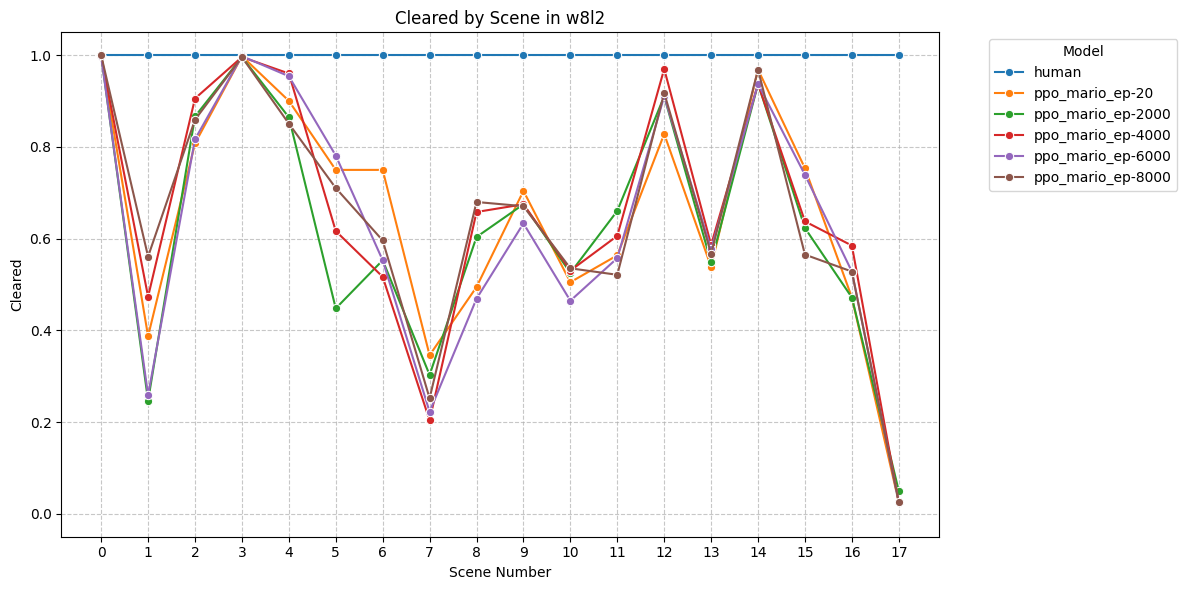

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_variable_by_scene(full_df, variable, level_name, split_by='Model', figsize=(12, 6), title_prefix=""):
    """
    Plots a specified variable across scenes for a given level, with different colors for each model.
    Scenes are ordered numerically on the x-axis, and any NaN scenes are removed.
    
    Parameters:
    -----------
    full_df : pandas DataFrame
        The full dataset containing the gameplay metrics
    variable : str
        The column name of the variable to plot (e.g., 'Cleared', 'Hits_taken', 'Duration')
    level_name : str
        The level to filter on (e.g., 'w1l1', 'w2l1')
    figsize : tuple, optional
        Figure size as (width, height)
    title_prefix : str, optional
        Prefix to add to the plot title
    
    Returns:
    --------
    matplotlib.figure.Figure
        The figure object
    """
    # Filter data for the specified level
    level_df = full_df[full_df['LevelFullName'] == level_name].copy()
    
    # Convert Scene to numeric for proper ordering
    level_df['Scene'] = pd.to_numeric(level_df['Scene'])
    
    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)
    
    # Calculate mean values for each scene and model
    grouped_df = level_df.groupby([split_by, 'Scene'])[variable].mean().reset_index()
    
    # Plot with different colors for each model
    sns.lineplot(
        data=grouped_df,
        x='Scene',
        y=variable,
        hue=split_by,
        marker='o',
        ax=ax
    )
    
    # Improve the plot appearance
    title = f"{title_prefix}{'Performance: ' if title_prefix else ''}{variable} by Scene in {level_name}"
    ax.set_title(title)
    ax.set_xlabel('Scene Number')
    ax.set_ylabel(variable)
    
    # Force x-axis to have integer ticks at each scene number
    scene_values = sorted(level_df['Scene'].unique())
    ax.set_xticks(scene_values)
    
    # If plotting a boolean variable like 'Cleared', set y-axis limits appropriately
    if variable == 'Cleared' or level_df[variable].dtype == bool:
        ax.set_ylim(-0.05, 1.05)
    
    # Add grid for better readability
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Improve legend
    ax.legend(title=split_by, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adjust layout to make room for the legend
    plt.tight_layout()
    
    return fig

# Example usage:
fig = plot_variable_by_scene(full_df, 'Cleared', 'w8l2', split_by='Model')
plt.show()

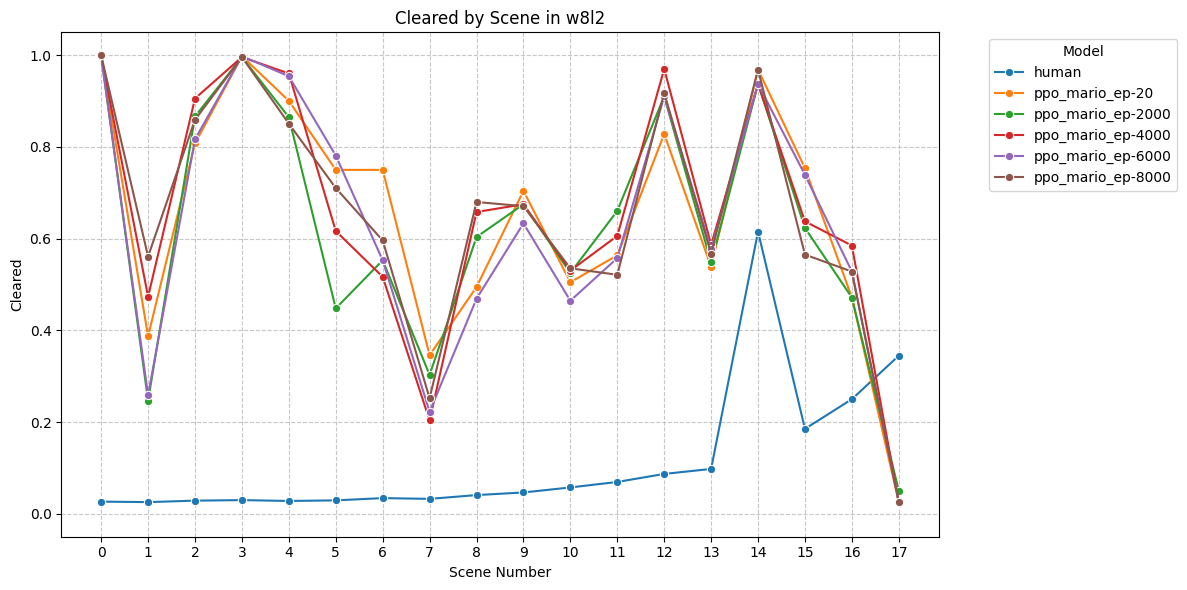

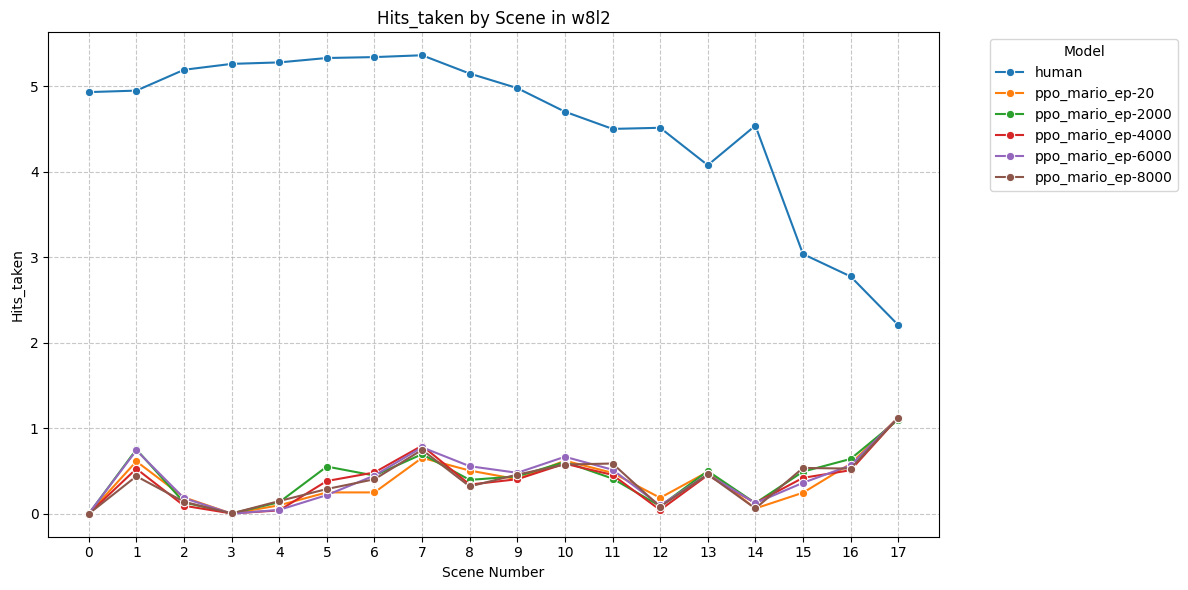

In [68]:
# Example usage:
fig = plot_variable_by_scene(full_df, 'Hits_taken', 'w8l2', split_by='Model')
plt.show()

In [62]:
full_df[full_df['Model'] == 'human']['Cleared'].value_counts()

Cleared
False    38797
True     12671
Name: count, dtype: int64